# Predicting Fraudulent Transactions for a Financial Company

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**The libraries used are**: 
 - Pandas:  This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go. 
 - Seaborn/Matplotlib: For data visualization.
 - Numpy: Numpy arrays are very fast and can perform large computations in a very short time.


In [2]:
# loading the dataset to a Pandas DataFrame
df = pd.read_csv('C:/Users/hp/Downloads/Fraud.csv')

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
# first 5 rows of the dataset
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
# To print the information of the data we can use data.info() command.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.shape

(6362620, 11)

In [8]:
pd.isnull(df)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [9]:
pd.isnull(df).sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
# Let’s see the mean, count, minimum, and maximum values of the data.
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Data Visualization
In this section, we will try to understand and compare all columns. 
Let’s count the columns with different datatypes like Category, Integer, Float. 

In [11]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 0
Float variables: 5


<Axes: xlabel='type', ylabel='count'>

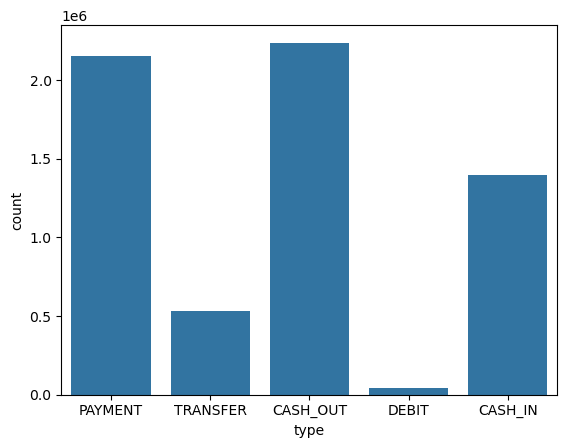

In [12]:
sns.countplot(x='type', data=df)

<Axes: xlabel='type', ylabel='amount'>

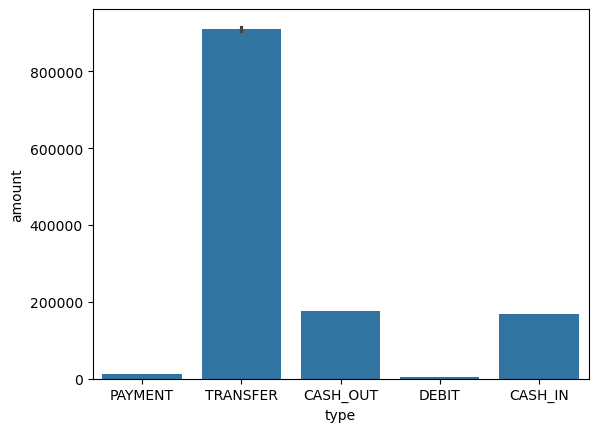

In [13]:
sns.barplot(x='type', y='amount', data=df)

#### Both graph clearly shows that most of the types cash_out and transfer are maximum in count and as well as in amount. Let’s check the distribution of data among both the prediction values.

In [14]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_24356\395256865.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['step'], bins=50)


<Axes: xlabel='step', ylabel='Density'>

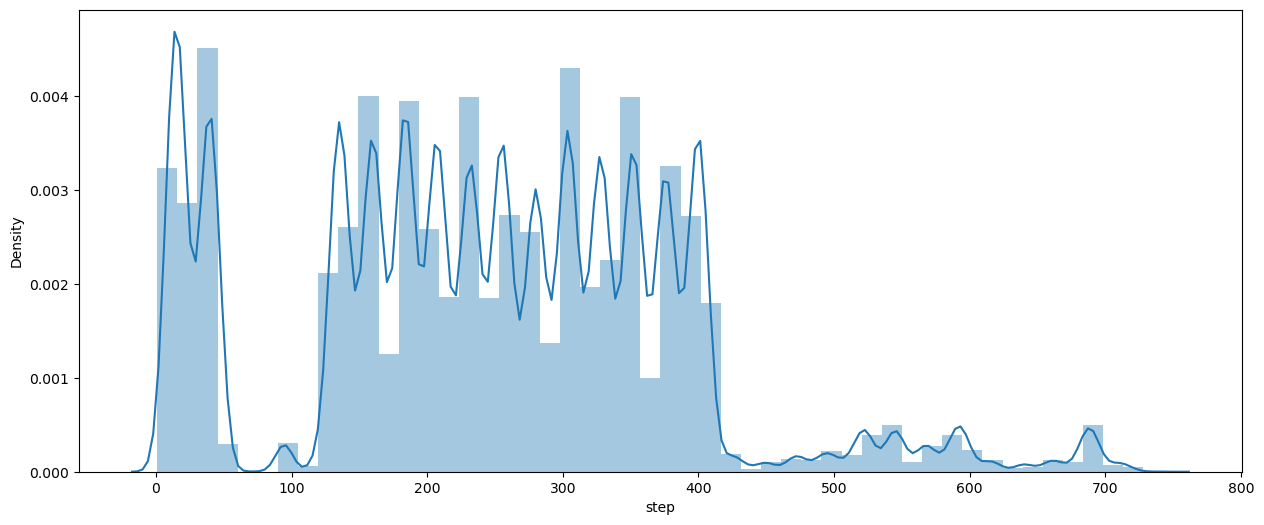

In [15]:
plt.figure(figsize=(15, 6))
sns.distplot(df['step'], bins=50)

#### The graph shows the maximum distribution among 200 to 400 of step.

<Axes: >

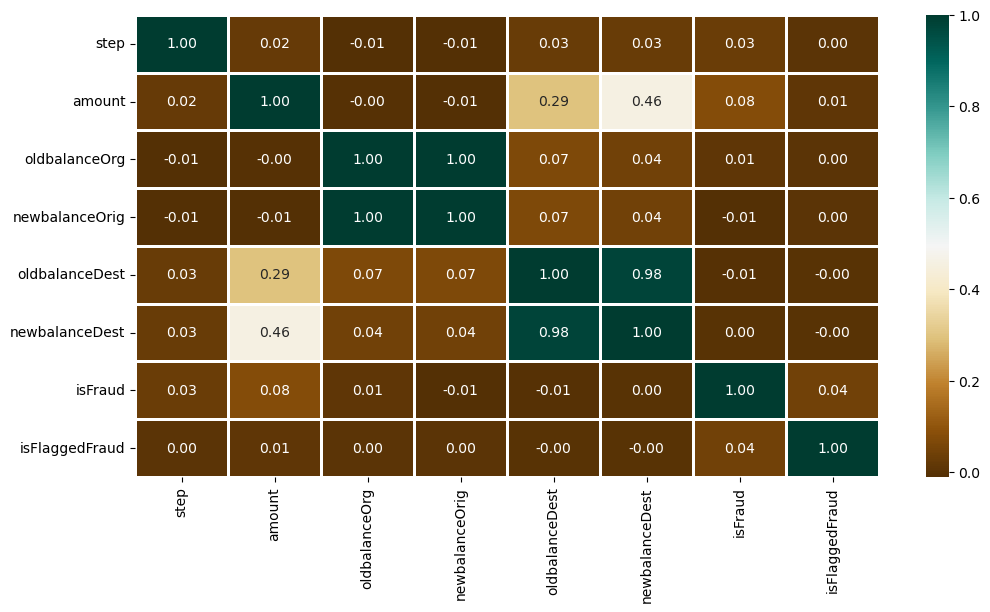

In [16]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

### Data Preprocessing
**This step includes the following**: 
 - Encoding of Type column
 - Dropping irrelevant columns like nameOrig, nameDest
 - Data Splittinging

In [17]:
type_new = pd.get_dummies(df['type'], drop_first=True)
data_new = pd.concat([df, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,False,True,False


In [18]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

Let’s check the shape of extracted data.

In [19]:
X.shape, y.shape

((6362620, 11), (6362620,))

## Model Building:
The data is split into training and testing sets using train_test_split() with a 70-30 split.
Models Used:
Logistic Regression and XGBoost Classifier are used. However.
Each model is trained on the training data (X_train, y_train) and predictions are made using predict_proba() to calculate probabilities.

## Model Evaluation:
The ROC AUC score (roc_auc_score) is used to evaluate the models, both on training and validation sets, which is a good metric for imbalanced classification problems (like fraud detection).
The results show the Training Accuracy and Validation Accuracy based on the AUC score for each model.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=42)

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [22]:
models = [LogisticRegression(), XGBClassifier()]
 
for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')
     
    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))
     
    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() : 
Training Accuracy :  0.8876833882800854
Validation Accuracy :  0.8852715942193774

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9999774189140321
Validation Accuracy :  0.999212631773824



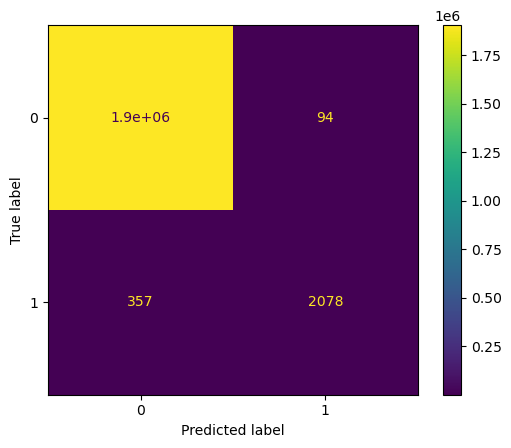

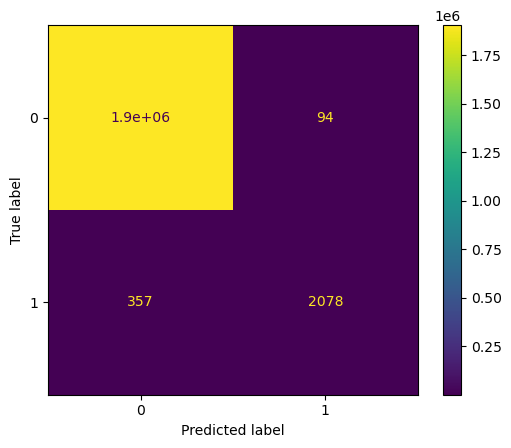

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'models[1]' is your trained classifier
cm_display = ConfusionMatrixDisplay.from_estimator(models[1], X_test, y_test)

cm_display.plot()
plt.show()

### Confusion Matrix Interpretation:

- **True Negative (TN)**: Top-left (1.9e+06)  
  - This represents the number of correctly predicted non-fraudulent transactions. Your model has correctly identified ~1.9 million transactions as non-fraud.

- **False Positive (FP)**: Top-right (94)  
  - This value indicates the number of non-fraudulent transactions incorrectly predicted as fraud. Your model has misclassified 94 transactions as fraud when they weren't.

- **False Negative (FN)**: Bottom-left (357)  
  - This represents the number of fraudulent transactions incorrectly predicted as non-fraud. The model missed 357 fraud transactions.

- **True Positive (TP)**: Bottom-right (2078)  
  - This value indicates the number of correctly predicted fraudulent transactions. Your model has correctly identified 2078 fraud transactions.

### Key Metrics:
From the confusion matrix, we can derive the following performance metrics:

1. **Accuracy**:
   - [Accuracy = (TP + TN) / (TP + TN + FP + FN)]
   - This model is highly accurate, as the majority of predictions fall in the correct categories (TN and TP).

2. **Precision**: (for fraud detection):
   - [Precision = TP / (TP + FP)]
   - This indicates how many of the transactions your model predicted as fraud were actually fraudulent.

3. **Recall**: (Sensitivity or True Positive Rate):
   - [Recall = TP / (TP + FN)]
   - Recall measures how many of the actual fraudulent transactions were correctly identified by the model.

4. **F1-Score**:
   - [F1 = 2 * (Precision * Recall) / (Precision + Recall)]
   - F1-Score is the harmonic mean of precision and recall, providing a single metric that balances the two.

## Here are the calculated metrics based on confusion matrix:

**Accuracy**: 99.98%,
**Precision**: 95.67%,
**Recall**: 85.34%,
**F1-Score**: 90.21%

These values suggest that your model is highly accurate and performs well in identifying fraudulent transactions (precision), though there is some room for improvement in catching all fraud cases (recall). The F1-Score balances both precision and recall, reflecting strong overall performance.flecting strong overall performance..l.


## Conclusion on Model Performance:
XGBoost is likely performing well based on the AUC score and confusion matrix. XGBoost is known for handling imbalanced data better, which is important in fraud detection.
Logistic Regression may also give decent results, but typically performs worse than tree-based methods like XGBoost in such scenarios.